In [5]:
# pip install wfdb

In [2]:
import wfdb
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
os.mkdir('data')
wfdb.dl_database('afdb', os.getcwd() + '/data')

Generating record list for: 00735
Generating record list for: 03665
Generating record list for: 04015
Generating record list for: 04043
Generating record list for: 04048
Generating record list for: 04126
Generating record list for: 04746
Generating record list for: 04908
Generating record list for: 04936
Generating record list for: 05091
Generating record list for: 05121
Generating record list for: 05261
Generating record list for: 06426
Generating record list for: 06453
Generating record list for: 06995
Generating record list for: 07162
Generating record list for: 07859
Generating record list for: 07879
Generating record list for: 07910
Generating record list for: 08215
Generating record list for: 08219
Generating record list for: 08378
Generating record list for: 08405
Generating record list for: 08434
Generating record list for: 08455
Generating list of all files for: 00735
Generating list of all files for: 03665
Generating list of all files for: 04015
Generating list of all files f

In [5]:
print('Current directory is: {}'.format(os.getcwd()))

Current directory is: C:\Users\masud\Desktop


In [18]:
records = []
properties = []
annot = []
AnnSymb = []
AnnSamp = []
AnnRhythm = []
Rpeak_Samp = []
Rpeak_Symb = []
for f in glob.glob('C:/Users/masud/Desktop/data/*.dat'): ##### change the path (afib) to your own directory. The rest should 
                                                         ##### remin the same
    sig, fields = wfdb.rdsamp(f[:-4])  #### In this function, you have the opportunity to pass 
                                       #### "channels=[0]" or "channels=[1]" to select channel 1 or 2.
    ann = wfdb.rdann(f[:-4], 'atr')
    QRS = wfdb.rdann(f[:-4], 'qrs')
    Symb = pd.Series(ann.symbol)
    Samp = pd.Series(ann.sample)
    QRS_Symb = pd.Series(QRS.symbol)
    QRS_Samp = pd.Series(QRS.sample)
    Rhythm = pd.Series(ann.aux_note)
    records.append(sig)
    properties.append(fields)
    annot.append(ann)
    AnnSymb.append(Symb)
    AnnSamp.append(Samp)
    Rpeak_Symb.append(QRS_Symb)
    Rpeak_Samp.append(QRS_Samp)
    AnnRhythm.append(Rhythm)
    
AnnSymb = pd.Series(AnnSymb).values
AnnSamp = pd.Series(AnnSamp).values

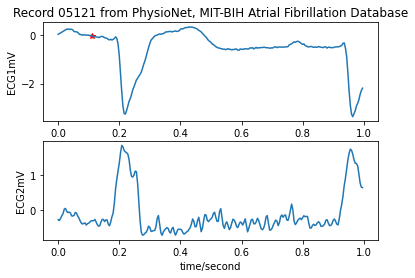

{'record_name': '05121',
 'n_sig': 2,
 'fs': 250,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 250,
 'base_time': datetime.time(16, 0),
 'base_date': None,
 'comments': [],
 'sig_name': ['ECG1', 'ECG2'],
 'p_signal': array([[ 0.045, -0.275],
        [ 0.07 , -0.3  ],
        [ 0.1  , -0.235],
        [ 0.13 , -0.16 ],
        [ 0.16 , -0.1  ],
        [ 0.195,  0.03 ],
        [ 0.215,  0.05 ],
        [ 0.255, -0.035],
        [ 0.25 , -0.07 ],
        [ 0.255, -0.055],
        [ 0.245, -0.08 ],
        [ 0.25 , -0.165],
        [ 0.22 , -0.17 ],
        [ 0.155, -0.15 ],
        [ 0.15 , -0.065],
        [ 0.14 , -0.085],
        [ 0.125, -0.17 ],
        [ 0.06 , -0.23 ],
        [ 0.03 , -0.31 ],
        [ 0.03 , -0.375],
        [ 0.005, -0.4  ],
        [ 0.02 , -0.38 ],
        [ 0.015, -0.37 ],
        [ 0.005, -0.43 ],
        [ 0.015, -0.39 ],
        [ 0.005, -0.375],
        [-0.015, -0.34 ],
        [ 0.   , -0.305],
        [-0.03 , -0.305],
        [-0.05 , 

In [16]:
record = wfdb.rdrecord('C:/Users/masud/Desktop/data/05121', sampto=250)
ann = wfdb.rdann('C:/Users/masud/Desktop/data/05121', 'atr', sampto=250)
wfdb.plot_wfdb(record=record, annotation=ann, title='Record 05121 from PhysioNet, MIT-BIH Atrial Fibrillation Database', time_units='seconds') 
display(record.__dict__)

In [1]:
print("Testing...")

Testing...
